<a href="https://colab.research.google.com/github/Auta01/Pytorch/blob/main/pytorch_classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Clasification

In [24]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 100

X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [25]:
len(X), len(y)

(100, 100)

In [26]:
print(f'{X[:5]}')
print(f'{y[:5]}')

[[-0.40957228 -0.70266396]
 [ 0.75810247  0.33360948]
 [-0.64086599  0.48813954]
 [ 0.78212694 -0.59114489]
 [ 0.77303687 -0.71826406]]
[1 1 1 0 0]


In [27]:
#Make dataframe of circles data
import pandas as pd
circles =pd.DataFrame({'X1':X[:,0],
                      'X2':X[:,1],
                      'label':y})

circles.head(10)

,X1,X2,label
0,-0.409572,-0.702664,1
1,0.758102,0.333609,1
2,-0.640866,0.488140,1
3,0.782127,-0.591145,0
4,0.773037,-0.718264,0
5,0.215881,-0.930492,0
6,-0.916040,0.317596,0
7,-0.637408,-0.472662,1
8,0.323051,0.973140,0
9,0.976609,-0.025317,0


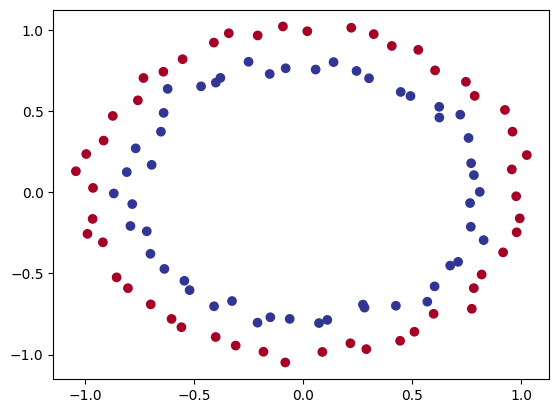

In [28]:
#Visualize , Visualize, Visaulize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [29]:
## check input and output shapes
X.shape, y.shape


((100, 2), (100,))

In [30]:
#view the first sample of feature and labels
X_sample = X[0]
y_sample = y[0]

print(f'values for one sample of x: {X_sample} and the same for y:{y_sample}')
print(f'shapes of one samples of X:{X_sample.shape}and the same for y:{y_sample.shape}')

values for one sample of x: [-0.40957228 -0.70266396] and the same for y:1
shapes of one samples of X:(2,)and the same for y:()


Turning data into tensor

In [31]:
#Turn data into tensor
import torch

# Convert X to tensor if it's not already one
if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X).type(torch.float)

# Convert y to tensor if it's not already one
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.4096, -0.7027],
         [ 0.7581,  0.3336],
         [-0.6409,  0.4881],
         [ 0.7821, -0.5911],
         [ 0.7730, -0.7183]]),
 tensor([1., 1., 1., 0., 0.]))

In [32]:
type(X), X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [33]:
#split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [34]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [35]:
#2Building a model
import torch
from torch import nn

#construct a model that subclasses nn.module
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    #2.Create 2 nn.linear
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
#Define a forward method that outlines the forward pass
  def forward(self, X):
    return self.layer_2(self.layer_1(X))

    #instanciate an instance of our model class and send it to the target device

# Get CPU, GPU or MPS device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

model_0 = circleModelV0().to(device)
model_0

Using cpu device


circleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [36]:
next(model_0.parameters()).device

device(type='cpu')

In [37]:
## lets replicate the model above using nn.sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)

)

In [38]:
#Make some predictions
with torch.inference_mode():
  untrained_preds =model_0(X_test.to(device))

print(f'Length of predictions: {len(untrained_preds)}, shape:{untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape:{X_test.shape}')
print(f'First 10 predictions {untrained_preds[:10]}')
print(f'First 10 test labels {y_test[:10]}')

Length of predictions: 20, shape:torch.Size([20, 1])
Length of test samples: 20, Shape:torch.Size([20, 2])
First 10 predictions tensor([[ 0.1048],
        [ 0.2971],
        [ 0.1002],
        [-0.0814],
        [ 0.0443],
        [-0.0773],
        [ 0.0321],
        [-0.0105],
        [-0.0765],
        [ 0.1894]])
First 10 test labels tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.])


In [39]:
##Setting up a loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1 )

In [40]:
#calculate the accuracy of 100 examples what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc =correct/len(y_pred)*100
  return acc

In [41]:
##view thr first 5 output of the forward pass on the test data
with torch.inference_mode():

 y_logits = model_0(X_test.to(device)[:5])
y_logits


tensor([[ 0.1048],
        [ 0.2971],
        [ 0.1002],
        [-0.0814],
        [ 0.0443]])

In [42]:
#use a sigmiod activation function to turn them into predcition probabilities

y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5262],
        [0.5737],
        [0.5250],
        [0.4797],
        [0.5111]])

In [43]:
#find the predicted lables
y_preds = torch.round(y_preds_probs)

#in full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]

#Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([1., 1., 1., 0., 1.])

In [44]:
y_test[:5]

tensor([0., 0., 1., 0., 0.])

In [54]:
#Building a Trainig loop and testing optimization loop
torch.manual_seed(42)
#set the number of epochs
epochs = 100

#put data to target device
X_train, y_train =X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range (epochs):
  #Training
  model_0.train()

  #froward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

 #Calculate the loss/accuracy
  loss = loss_fn(y_logits,
                  y_train)
  acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizers step
  optimizer.step()

  ##Testing
  model_0.eval()
  with torch.inference_mode():

    #forward pass
    test_logits =model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #Calculate the loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


    #print out what is happeining
    if epoch % 10 == 0:
      print(f'Epoch:{epoch} | loss:{loss:.5f}, Acc:{acc:.2f}% | test loss{test_loss:.5f},test acc:{test_acc:2f}%')


Epoch:0 | loss:0.68792, Acc:55.00% | test loss0.74060,test acc:30.000000%
Epoch:10 | loss:0.68788, Acc:55.00% | test loss0.74106,test acc:30.000000%
Epoch:20 | loss:0.68785, Acc:55.00% | test loss0.74144,test acc:30.000000%
Epoch:30 | loss:0.68783, Acc:55.00% | test loss0.74176,test acc:30.000000%
Epoch:40 | loss:0.68781, Acc:55.00% | test loss0.74202,test acc:30.000000%
Epoch:50 | loss:0.68780, Acc:55.00% | test loss0.74225,test acc:30.000000%
Epoch:60 | loss:0.68779, Acc:55.00% | test loss0.74243,test acc:30.000000%
Epoch:70 | loss:0.68778, Acc:55.00% | test loss0.74259,test acc:30.000000%
Epoch:80 | loss:0.68778, Acc:55.00% | test loss0.74272,test acc:30.000000%
Epoch:90 | loss:0.68778, Acc:55.00% | test loss0.74282,test acc:30.000000%


In [55]:
import requests
from pathlib import Path
#download helper fuction
if Path ('helper_function.py').is_file():
  print('helper function is already exist, skipping dowload')

else:
  print('Download helper_function.py')

request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

with open('helper_function.py','wb') as f:
  f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary


helper function is already exist, skipping dowload


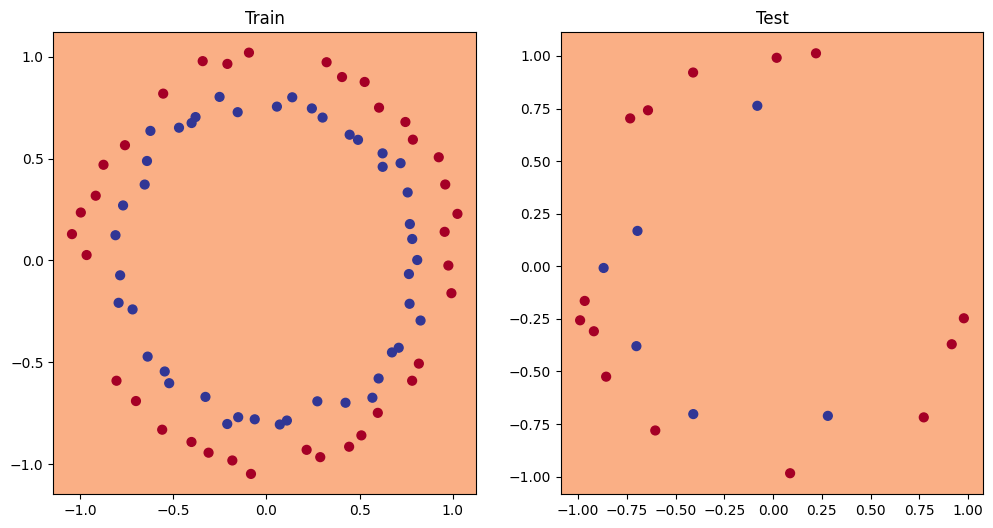

In [59]:
#ploot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

In [60]:
# Improving our model
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0866, -0.2816],
                      [ 0.4413, -0.5121],
                      [-0.3306, -0.1917],
                      [-0.4144,  0.0489],
                      [-0.7155,  0.6702]])),
             ('0.bias', tensor([-0.5989,  0.5569,  0.1193, -0.2339,  0.4421])),
             ('1.weight',
              tensor([[ 0.0160,  0.2612,  0.0521, -0.1039,  0.2910]])),
             ('1.bias', tensor([-0.0893]))])

In [73]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, X):
    #X = self.layer_1(X)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(X)))
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [76]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# set an Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

#write a training loop and evaluation loop for model
torch.manual_seed(42)
#Train for longer
epochs = 100
#Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ##Training
  model_1.train()
  #Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)
  #opitmizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()

  ##Teesting loop
  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
   #calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

#print out what's happening

if epoch % 100 == 0:
  print(f'Epoch:{epoch} | Loss {loss:.5f}, Acc: {acc:.2f} | Test acc {test_acc:.5f}')



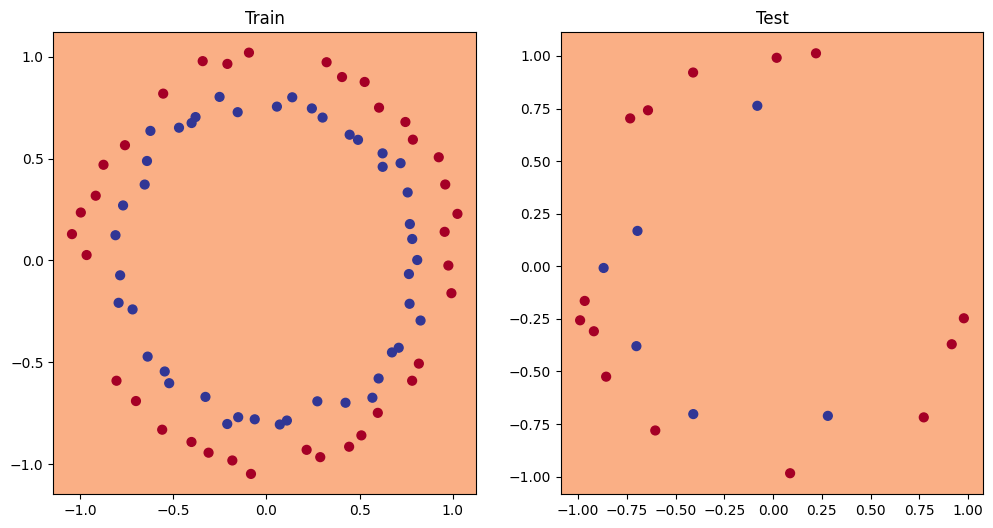

In [77]:
#ploot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

In [80]:
##preparing data to see if our model can fit a straight line
#create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression=weight *x_regression + bias

#check the data
print(len(x_regression))
x_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [90]:
#Create train and test split
train_split = int(0.8*len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:],y_regression[train_split:]

#Check the lenhts of each
len(x_train_regression), len(x_test_regression), len(y_train_regression),   len(y_test_regression)

(80, 20, 80, 20)

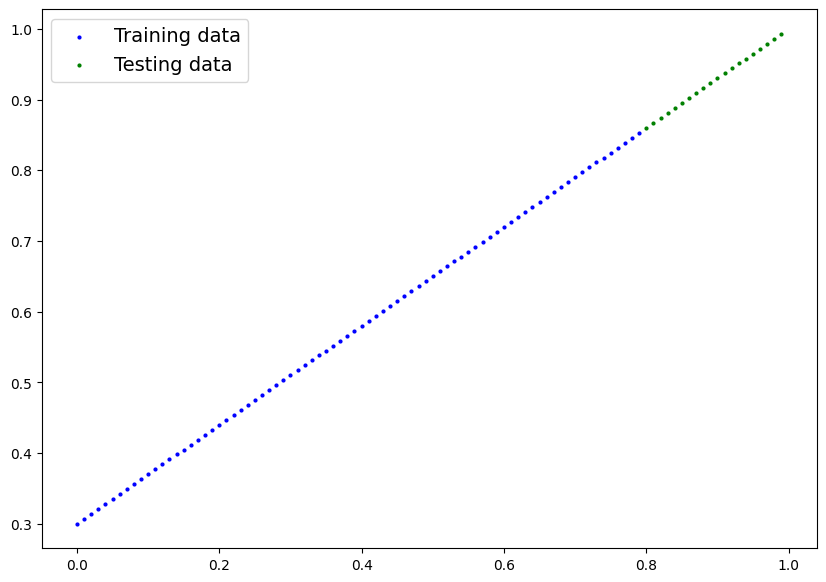

In [91]:
plot_predictions(train_data =x_train_regression,
                train_labels=y_train_regression,
                test_data=x_test_regression,
                test_labels=y_test_regression);

In [92]:
#Adjust model_1 to fit a straight line
#same architecture as model_1
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [93]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [107]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer =torch.optim.SGD(params =model_2.parameters(),
                           lr=0.1)


#Training the model
torch.manual_seed(42)

epochs = 100

#put the data on the target device
x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)

#Training
for epoch in range(epochs):
  y_pred = model_2(x_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

    #print out what's happenin
    if epoch % 100 == 0:
      print(f'Epoch:{epoch} | Loss: {loss:.5f} | Test loss:{test_loss:.5f}')

Epoch:0 | Loss: 0.05698 | Test loss:0.01061


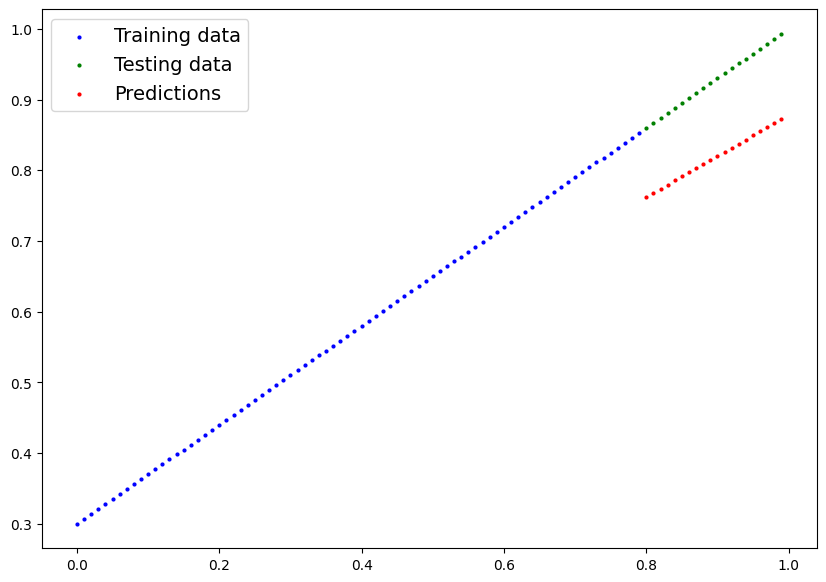

In [109]:
#Evaluating the model
model_2.eval()

#make prediction
with torch.inference_mode():
  y_preds = model_2(x_test_regression)
  #plot data and prediction
plot_predictions(train_data = x_train_regression,
                 train_labels = y_train_regression,
                 test_data = x_test_regression,
                 test_labels =y_test_regression,
                 predictions=y_preds);